In [1]:
from scipy.misc import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import scipy as sp
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from PIL import Image
import time
import scipy
from scipy import linalg

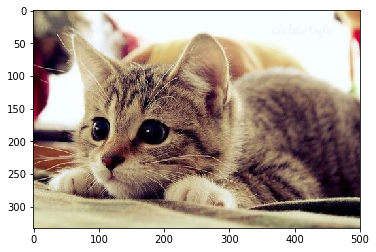

In [2]:
kotya = imread("/Users/mikhailbushaev/Downloads/kotyatochka.jpeg")
fig = plt.figure()
plt.imshow(kotya)

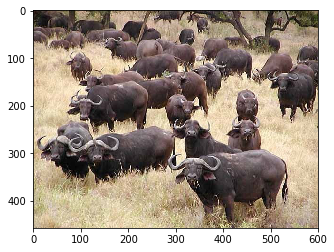

In [3]:
bizon = imread("/Users/mikhailbushaev/Downloads/bizon.jpeg")
fig = plt.figure()
plt.imshow(bizon)

In [4]:
kotya = kotya.sum(-1)
spectre = kotya
graph = image.img_to_graph(spectre)
beta = 10
eps = 1e-3
graph.data = np.exp(-beta * graph.data / spectre.std())+ eps
N_REGIONS = 8

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


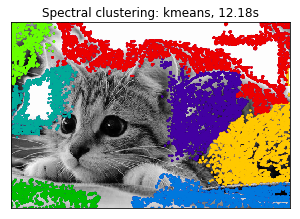

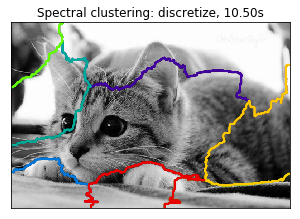

In [5]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels,
                                 random_state=10,eigen_solver='amg')
    t1 = time.time()
    labels = labels.reshape(spectre.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(spectre,   cmap=plt.cm.gray)
    
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.spectral(l / float(N_REGIONS)), ])
    plt.xticks(())
    plt.yticks(())
    plt.title('Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0)))

plt.show()

In [6]:
bizon = bizon.sum(-1)
biztre = bizon
graph = image.img_to_graph(biztre)
beta = 10
eps = 1e-3
graph.data = np.exp(-beta * graph.data / biztre.std()) + eps
N_REGIONS = 8

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


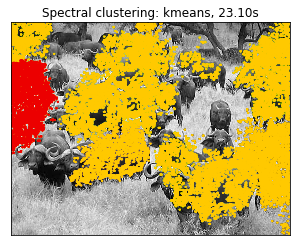

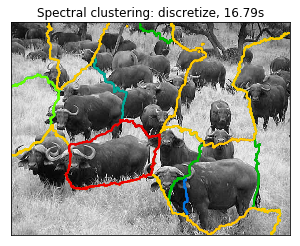

In [7]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels,
                                 random_state=25,eigen_solver='amg')
    t1 = time.time()
    labels = labels.reshape(biztre.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(biztre,   cmap=plt.cm.gray)
    
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.spectral(l / float(N_REGIONS)), ])
    plt.xticks(())
    plt.yticks(())
    plt.title('Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0)))

plt.show()